
 ## <a style="color:#900C3F " font=" Bookman"  size="75" >&quot;          TP 3 Regression Linear &quot;    </a> 
   

****


![Image of Yaktocat](https://www.onclick360.com/wp-content/uploads/2018/12/linear-regression.jpg)

## <p style="color:#2C7F98 " > Réalisé par : Amina Dziri </p>

## <p style="color:#9D125A " >  Introduction Linear Regression </p>
***


Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.

****

The equation of regression line is represented as:

 h(Xi) = B0 + \B1*Xi 

Here,

h(Xi) represents the predicted response value for ith observation.
B0 and B1 are regression coefficients and represent y-intercept and slope of regression line respectively.

****

##### <p style=" " > Python n’a pas nativement de fonction pour importer des données au format csv. Nous allons donc utiliser la bibliothèque pyreadstat afin d’importer les données. Cette bibliothèque est comprise dans Anaconda. Nous utiliserons aussi numpy et matplotlib pour les visualisations. </p>


In [17]:
!pip install pyreadstat

In [1]:

import pyreadstat

#df, meta = pyreadstat.read_sas7bdat('test_scores.sav')
df, meta = pyreadstat.read_sav('test_scores.sav')
print(df.head())
print(meta.column_names)
print(meta.column_labels)
print(meta.column_names_to_labels)
print(meta.number_rows)
print(meta.number_columns)
print(meta.file_label)
print(meta.file_encoding)

  school  school_setting  school_type classroom  teaching_method  n_student  \
0  ANKYI             1.0          2.0       6OL              0.0       20.0   
1  ANKYI             1.0          2.0       6OL              0.0       20.0   
2  ANKYI             1.0          2.0       6OL              0.0       20.0   
3  ANKYI             1.0          2.0       6OL              0.0       20.0   
4  ANKYI             1.0          2.0       6OL              0.0       20.0   

  student_id  gender  lunch  pretest  posttest  
0      2FHT3     1.0    2.0     62.0      72.0  
1      3JIVH     1.0    2.0     66.0      79.0  
2      3XOWE     0.0    2.0     64.0      76.0  
3      556O0     1.0    2.0     61.0      77.0  
4      74LOE     0.0    2.0     64.0      76.0  
['school', 'school_setting', 'school_type', 'classroom', 'teaching_method', 'n_student', 'student_id', 'gender', 'lunch', 'pretest', 'posttest']
['School', 'School setting', 'School type', 'Classroom', 'Teaching method', 'Number of

In [15]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
school             2133 non-null object
school_setting     2133 non-null float64
school_type        2133 non-null float64
classroom          2133 non-null object
teaching_method    2133 non-null float64
n_student          2133 non-null float64
student_id         2133 non-null object
gender             2133 non-null float64
lunch              2133 non-null float64
pretest            2133 non-null float64
posttest           2133 non-null float64
dtypes: float64(8), object(3)
memory usage: 183.4+ KB


In [27]:
df.describe()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,1.814346,1.258322,0.356306,22.796531,0.495077,1.569620,54.955931,67.102203
std,0.793525,0.437814,0.479019,4.228893,0.500093,0.495245,13.563101,13.986789
min,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,22.000000,32.000000
25%,1.000000,1.000000,0.000000,20.000000,0.000000,1.000000,44.000000,56.000000
50%,2.000000,1.000000,0.000000,22.000000,0.000000,2.000000,56.000000,68.000000
75%,2.000000,2.000000,1.000000,27.000000,1.000000,2.000000,65.000000,77.000000
max,3.000000,2.000000,1.000000,31.000000,1.000000,2.000000,93.000000,100.000000


### On a besoin de deux features: 
### Cible="posttest" et la valeur prédite est: "pretest"

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

x= df['posttest']
y= df['pretest']
plt.scatter(x,y)
plt.xlabel("'posttest")
plt.ylabel("pretest")

Text(0, 0.5, 'pretest')

In [17]:
np.corrcoef(x,y)

array([[1.        , 0.95088429],
       [0.95088429, 1.        ]])

In [18]:
from scipy import stats
#linregress() renvoie plusieurs variables de retour. On s'interessera 
# particulierement au slope et intercept
stats.linregress(x, y)

LinregressResult(slope=0.9220801220787419, intercept=-6.917677352558954, rvalue=0.9508842857175768, pvalue=0.0, stderr=0.006502423507188086)

#### Meme méthode mais avec bibliothéque: "sklearn.linear_model" en important LinearRegression

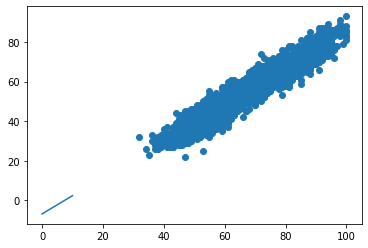

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

#### The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [28]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     0.9472088103606956
Model intercept: -6.9085770855532065


### The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. Execute following command:

In [36]:
X = np.array(df['posttest']).reshape(-1, 1) 
y = np.array(df['pretest']).reshape(-1, 1) 

# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column 
df.dropna(inplace = True) 

# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

# Splitting the data into training and testing data 
regr = LinearRegression() 

regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 


0.9019203076533886


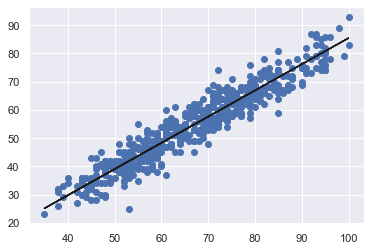

In [44]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 

plt.show() 


In [45]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,32.0,27.901276
1,44.0,47.401729
2,33.0,28.829869
3,68.0,66.902182
4,54.0,56.687659
...,...,...
529,43.0,41.830171
530,36.0,33.472834
531,48.0,50.187508
532,62.0,63.187810


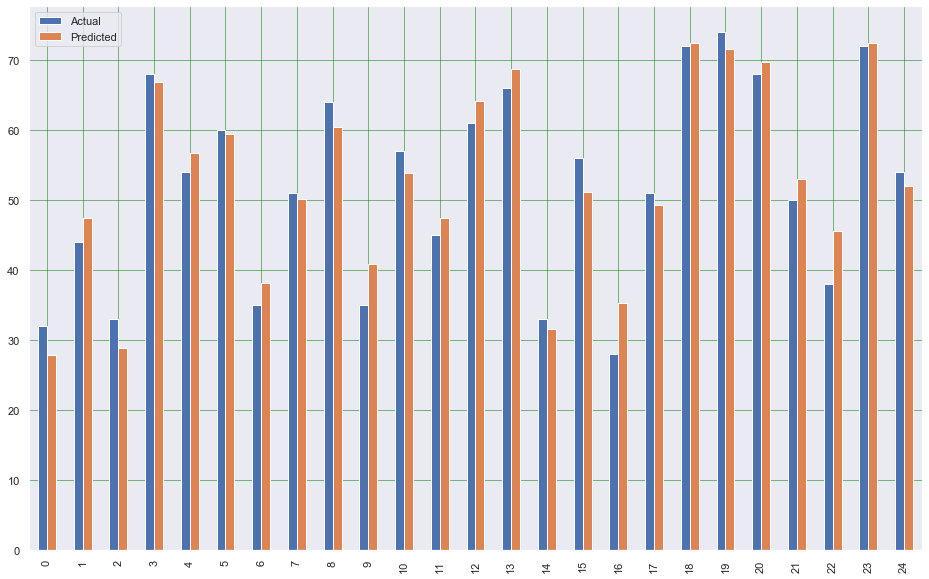

In [51]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

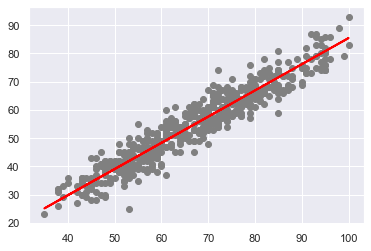

In [50]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.376236803849357
Mean Squared Error: 17.75279750157544
Root Mean Squared Error: 4.213406875863693


## <p style="color:#9D125A " >  Simple Linear Regression </p>
***



We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form

                      y=ax+b
where a is commonly known as the slope, and b is commonly known as the intercept.

Consider the following data, which is scattered about a line with a slope of 0.92 and an intercept of -6.91:

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

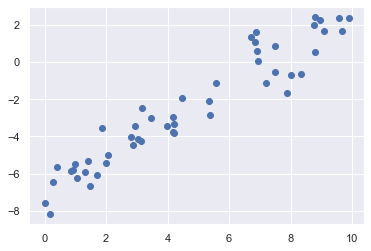

In [22]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 0.92 * x - 6.91 + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

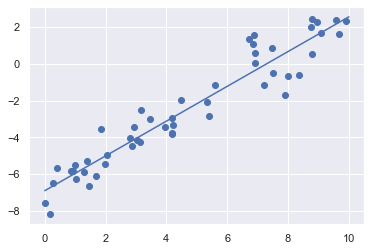

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [61]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     0.9472088103606956
Model intercept: -6.9085770855532065


###   => Valeur slope et intercept est presque la meme valeur que leurs valeurs avant le training

 ## <p style="color:#9D125A " > Linear Regression Multiple </p>
***




On ajoute une autre input le plus corrélé comme methode  pour choisir un nouveau feature: n_student

y=β1x1+β2x2+⋯+βnxn+β0

where
y : response variable

n : number of features

xn: n-th feature

βn: regression coefficient (weight) of the n-th feature

β0: y-intercept

![Image of Yaktocat](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTzhAkHi-1J24QokHv15e2Gk_eKIsui4VyT1w&usqp=CAU)

In [56]:
from mpl_toolkits.mplot3d import Axes3D

In [2]:

import pyreadstat

#df, meta = pyreadstat.read_sas7bdat('test_scores.sav')
df, meta = pyreadstat.read_sav('test_scores.sav')


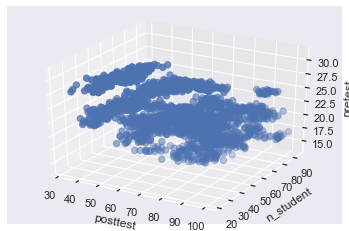

In [74]:
# Voici des données simulées
import numpy as np

x= df['posttest']
y= df['pretest']
z=df['n_student']

# Tracer le graphique
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x,y,z, zdir='z',s=40,depthshade=True)
ax.set_xlabel('posttest')
ax.set_ylabel('n_student')
ax.set_zlabel('pretest')

plt.show()

In [18]:
import pandas as pd
import numpy as np
from sklearn import linear_model


df, meta = pyreadstat.read_sav('test_scores.sav')
features = ['posttest', 'n_student']
target = 'pretest'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)


In [19]:
model.coef_

array([ 0.90948725, -0.08249401])

In [20]:
model.intercept_

-4.192090662919213

#### Based on the result of the fit, we obtain the following linear regression model:

 pretest=0.909*postest-0.082*n_student−4.19

## Accuracy assessment: R2

In the same we evaluated model performance with 2D linear model above, we can evaluate the 3D+ model performance with R-squared with model.score(X, y). X is the features, and y is the response variable used to fit the model.

In [21]:
model.score(X, y)

0.9046738587551966

Make future prediction

Let's make one prediction of gas production rate when:
1- Posttest = 72.0
2- n_student = 20.0


In [23]:
x_pred = np.array([72.0, 20.0])
x_pred = x_pred.reshape(-1, len(features))

In [24]:
model.predict(x_pred)

array([59.64111115])

## => la valeur prédite est plus proche au valeur réel est: 62.0

 ## <p style="color:#9D125A " > Full pipeline multi Linear Regression </p>
***



 

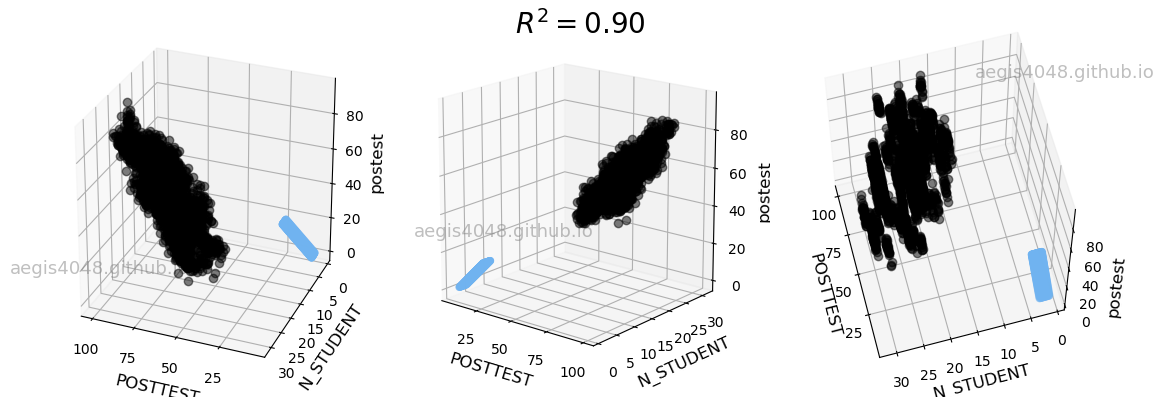

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################



X = df[['posttest', 'n_student']].values.reshape(-1,2)
Y = df['pretest']

######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('POSTTEST', fontsize=12)
    ax.set_ylabel('N_STUDENT', fontsize=12)
    ax.set_zlabel('postest', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()